# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing
values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.


In [1]:
import pandas as pd
import numpy as np

In [7]:
df =pd.read_csv("/content/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<Axes: >

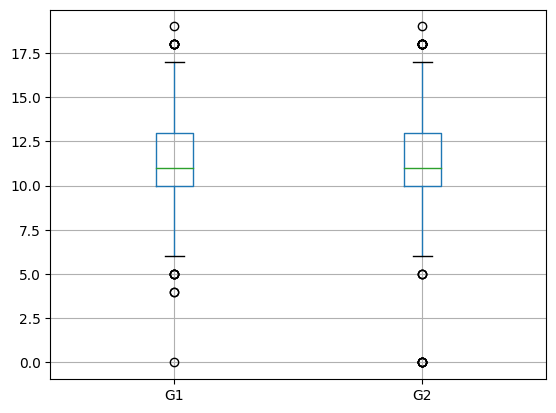

In [9]:
df.boxplot(column=['G1', 'G2'])

In [10]:
newdf = df[df['G1']>5.0]
newdf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<Axes: >

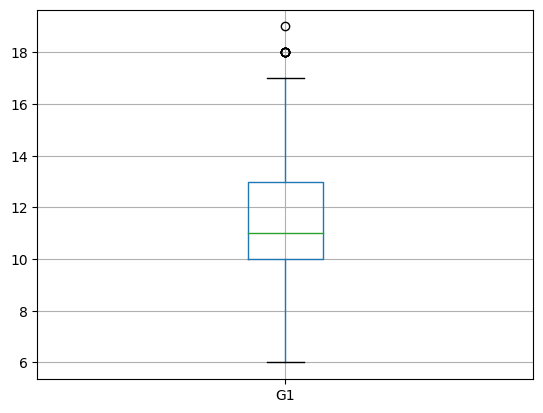

In [11]:
newdf.boxplot('G1')

Skewness is a measure of the asymmetry of a distribution

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox, norm

In [13]:
original_skewness = skew(df['G1'])

transformed_data = np.sqrt(df['G1'])

transformed_skewness = skew(transformed_data)

print("Original Skewness: ", original_skewness)
print("Transformed Skewness: ", transformed_skewness)

Original Skewness:  -0.0027672222073948627
Transformed Skewness:  -0.9092382254355722


To decrease skewness and transform a distribution closer to a normal distribution, you can use techniques like the Box-Cox transformation or Yeo-Johnson transformation. These transformations are specifically designed to stabilize variance and make the data more normal.

In [14]:
np.random.seed(42)

skewed_data = np.random.exponential(size=1000)

skewed_data

array([4.69268090e-01, 3.01012143e+00, 1.31674569e+00, 9.12942554e-01,
       1.69624870e-01, 1.69596292e-01, 5.98387686e-02, 2.01123086e+00,
       9.19082154e-01, 1.23125006e+00, 2.07993080e-02, 3.50355748e+00,
       1.78642954e+00, 2.38687625e-01, 2.00678989e-01, 2.02611423e-01,
       3.62753729e-01, 7.43927831e-01, 5.65537067e-01, 3.44222993e-01,
       9.46370874e-01, 1.50234529e-01, 3.45515512e-01, 4.56277218e-01,
       6.08934688e-01, 1.53793601e+00, 2.22735862e-01, 7.22029155e-01,
       8.97504721e-01, 4.75638498e-02, 9.35333021e-01, 1.86961252e-01,
       6.72639309e-02, 2.97368779e+00, 3.37063034e+00, 1.65233157e+00,
       3.63287860e-01, 1.02777315e-01, 1.15275076e+00, 5.80090843e-01,
       1.30152234e-01, 6.83547228e-01, 3.49937214e-02, 2.40042289e+00,
       2.99457777e-01, 1.08625580e+00, 3.73546582e-01, 7.34110896e-01,
       7.91223798e-01, 2.04388600e-01, 3.49280713e+00, 1.49224538e+00,
       2.80509442e+00, 2.25215200e+00, 9.11054412e-01, 2.54943538e+00,
      

In [15]:
skewness_before = skew(skewed_data)
skewness_before

1.865034222864843

In [16]:
transform_data, lambda_value = boxcox(skewed_data + 1)

In [18]:
skewness_after = skew(transform_data)
skewness_after

0.11912474144562714

Text(0.5, 1.0, 'Skewed Distribution: Skewness(1.87)')

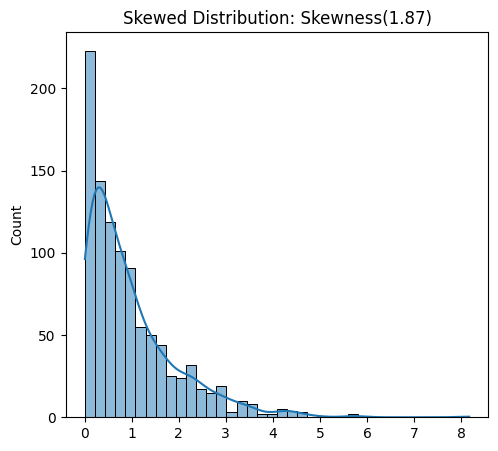

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(skewed_data, kde=True)
plt.title(f"Skewed Distribution: Skewness({skewness_before:.2f})")

Text(0.5, 1.0, 'Transformed Distribution: Skewness(0.12)')

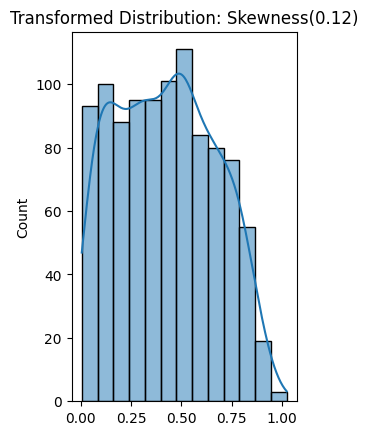

In [26]:
plt.subplot(1, 2, 2)
sns.histplot(transform_data, kde=True)
plt.title(f"Transformed Distribution: Skewness({skewness_after:.2f})")

In [27]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>